<a href="https://colab.research.google.com/github/good-michael-analysis/credit-risk-ml-model/blob/main/credit_risk_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load both CSV files
app = pd.read_csv('application_record.csv')
cred = pd.read_csv('credit_record.csv')

# Display their shapes (rows, columns)
print("Application Record shape:", app.shape)
print("Credit Record shape:", cred.shape)

# Show the first few rows of each to confirm they loaded properly
display(app.head())
display(cred.head())

Application Record shape: (438557, 18)
Credit Record shape: (1048575, 3)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# --- Data Completeness and Missing Value Check ---

print("\n=== Missing Values in Application Record ===")
app_missing = app.isnull().sum().sort_values(ascending=False)
print(app_missing[app_missing > 0])

print("\n=== Missing Values in Credit Record ===")
cred_missing = cred.isnull().sum().sort_values(ascending=False)
print(cred_missing[cred_missing > 0])

# Calculate overall completeness percentages
def completeness(df):
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    completeness_percent = 100 * (1 - (missing_cells / total_cells))
    return round(completeness_percent, 2)

print("\n=== Dataset Completeness Scores ===")
print(f"Application Record completeness: {completeness(app)}%")
print(f"Credit Record completeness: {completeness(cred)}%")


=== Missing Values in Application Record ===
OCCUPATION_TYPE    134203
dtype: int64

=== Missing Values in Credit Record ===
Series([], dtype: int64)

=== Dataset Completeness Scores ===
Application Record completeness: 98.3%
Credit Record completeness: 100.0%


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (adjust path if needed)
app = pd.read_csv('application_record.csv')

# Select only numeric columns
numeric_cols = app.select_dtypes(include=[np.number])

# Generate descriptive statistics
desc_stats = numeric_cols.describe(percentiles=[0.25, 0.5, 0.75]).T

# Add skewness and kurtosis
desc_stats["skew"] = numeric_cols.skew()
desc_stats["kurtosis"] = numeric_cols.kurtosis()

# Round values for clarity
desc_stats = desc_stats.round(2)

# Display the results
print("=== Descriptive Statistics for Numeric Fields ===")
display(desc_stats)


=== Descriptive Statistics for Numeric Fields ===


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
ID,438557.0,6022176.27,571637.02,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0,0.21,-0.09
CNT_CHILDREN,438557.0,0.43,0.72,0.0,0.0,0.0,1.0,19.0,1.81,5.08
AMT_INCOME_TOTAL,438557.0,187524.29,110086.85,26100.0,121500.0,160780.5,225000.0,6750000.0,8.83,324.55
DAYS_BIRTH,438557.0,-15997.90,4185.03,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0,-0.16,-1.05
DAYS_EMPLOYED,438557.0,60563.68,138767.80,-17531.0,-3103.0,-1467.0,-371.0,365243.0,1.74,1.03
FLAG_MOBIL,438557.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0,0.00,0.00
FLAG_WORK_PHONE,438557.0,0.21,0.40,0.0,0.0,0.0,0.0,1.0,1.45,0.11
FLAG_PHONE,438557.0,0.29,0.45,0.0,0.0,0.0,1.0,1.0,0.94,-1.12
FLAG_EMAIL,438557.0,0.11,0.31,0.0,0.0,0.0,0.0,1.0,2.52,4.36
CNT_FAM_MEMBERS,438557.0,2.19,0.90,1.0,2.0,2.0,3.0,20.0,0.92,1.90


In [ ]:
print("Average Annual Income:", app["AMT_INCOME_TOTAL"].mean())
print("Median Children Count:", app["CNT_CHILDREN"].median())
print("Average Family Members:", app["CNT_FAM_MEMBERS"].mean())
print("Average Age (years):", round(abs(app["DAYS_BIRTH"].mean()) / 365, 1))
print("Average Employment Duration (years):", round(abs(app["DAYS_EMPLOYED"].mean()) / 365, 1))

Average Annual Income: 187524.2860095039
Median Children Count: 0.0
Average Family Members: 2.194465029631268
Average Age (years): 43.8
Average Employment Duration (years): 165.9


In [ ]:
import numpy as np

# Replace placeholder values and convert to years
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].replace(365243, np.nan)
app['EMPLOYED_YEARS'] = abs(app['DAYS_EMPLOYED'] / 365)

print("Average Employment Duration (years):", round(app['EMPLOYED_YEARS'].mean(), 1))

Average Employment Duration (years): 7.2


In [ ]:
# Check record count and unique clients
print("Credit Record shape:", cred.shape)
print("Unique client IDs:", cred['ID'].nunique())

# Check frequency of status values
print("\nValue counts for STATUS:")
print(cred['STATUS'].value_counts())

Credit Record shape: (1048575, 3)
Unique client IDs: 45985

Value counts for STATUS:
STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64


In [ ]:
# ============================================================
# Import Libraries
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
# ============================================================
# Preprocessing
# ============================================================

# Convert DAYS_BIRTH to positive age in years
app['AGE_YEARS'] = (-app['DAYS_BIRTH'] / 365).round(1)

# Replace 365243 employment placeholder value with NaN
app['DAYS_EMPLOYED'] = app['DAYS_EMPLOYED'].replace(365243, np.nan)

# Convert employment duration into positive years
app['YEARS_EMPLOYED'] = (-app['DAYS_EMPLOYED'] / 365).round(1)

print("Preprocessing complete.")

Preprocessing complete.


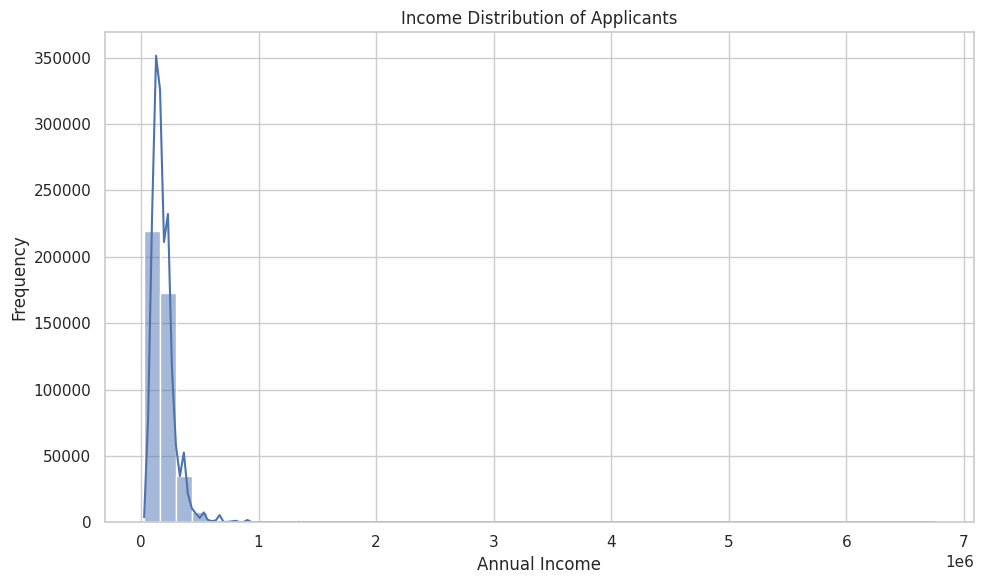

In [ ]:
# ============================================================
# Visualization 1 – Income Distribution
# ============================================================

plt.figure(figsize=(10,6))
sns.histplot(app['AMT_INCOME_TOTAL'], bins=50, kde=True)
plt.title("Income Distribution of Applicants")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

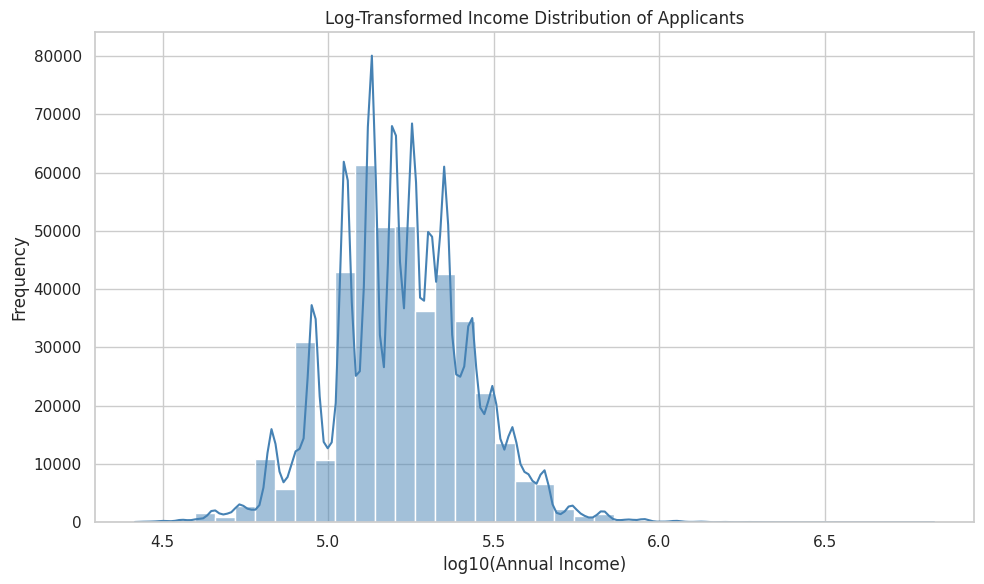

In [ ]:
# ============================================================
# Visualization 1 (Alt A) – Log-Transformed Income Distribution
# ============================================================

plt.figure(figsize=(10,6))

# Add a tiny constant (1) to avoid log10(0)
log_income = np.log10(app['AMT_INCOME_TOTAL'] + 1)

sns.histplot(log_income, bins=40, kde=True, color='steelblue')

plt.title('Log-Transformed Income Distribution of Applicants')
plt.xlabel('log10(Annual Income)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

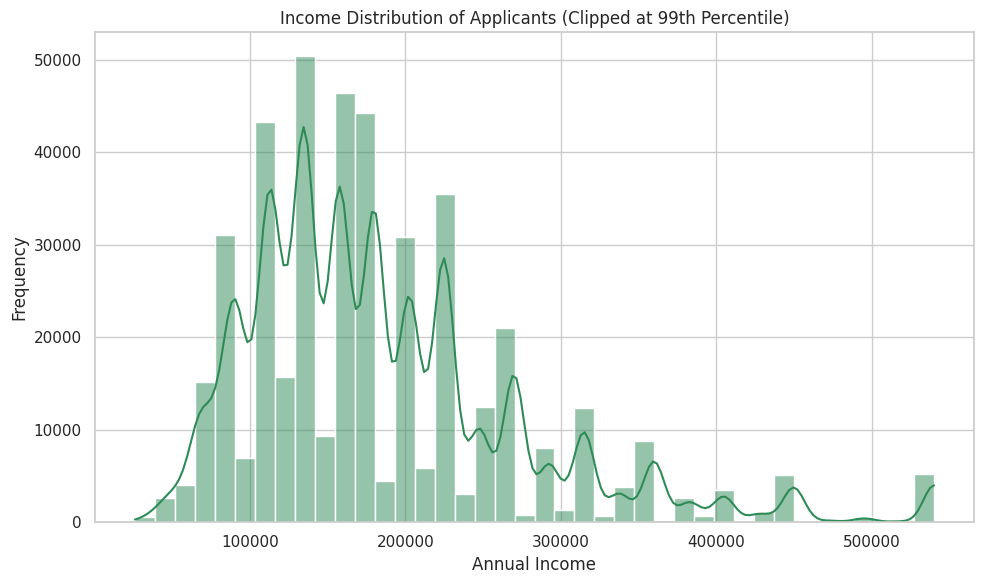

In [ ]:
# ============================================================
# Visualization 1 (Alt B) – Income Distribution (Clipped at 99th Percentile)
# ============================================================

plt.figure(figsize=(10,6))

# Clip extreme values
upper = app['AMT_INCOME_TOTAL'].quantile(0.99)
clipped_income = app['AMT_INCOME_TOTAL'].clip(upper=upper)

sns.histplot(clipped_income, bins=40, kde=True, color='seagreen')

plt.title('Income Distribution of Applicants (Clipped at 99th Percentile)')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

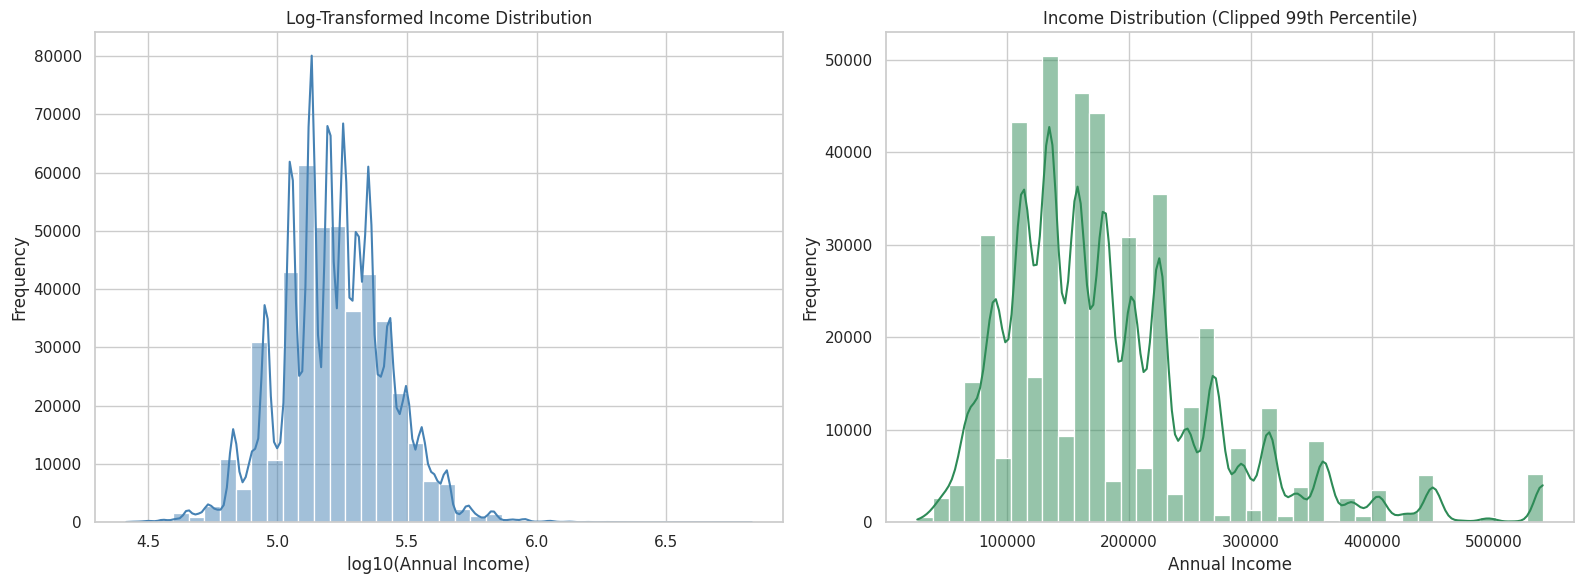

In [ ]:
# ============================================================
# Visualization 1 (Alt A) & (Alt B) – Side by Side Comparison
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Left: Log transform
sns.histplot(np.log10(app['AMT_INCOME_TOTAL'] + 1), bins=40, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Log-Transformed Income Distribution')
axes[0].set_xlabel('log10(Annual Income)')
axes[0].set_ylabel('Frequency')

# Right: Clipped
upper = app['AMT_INCOME_TOTAL'].quantile(0.99)
clipped = app['AMT_INCOME_TOTAL'].clip(upper=upper)

sns.histplot(clipped, bins=40, kde=True, ax=axes[1], color='seagreen')
axes[1].set_title('Income Distribution (Clipped 99th Percentile)')
axes[1].set_xlabel('Annual Income')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

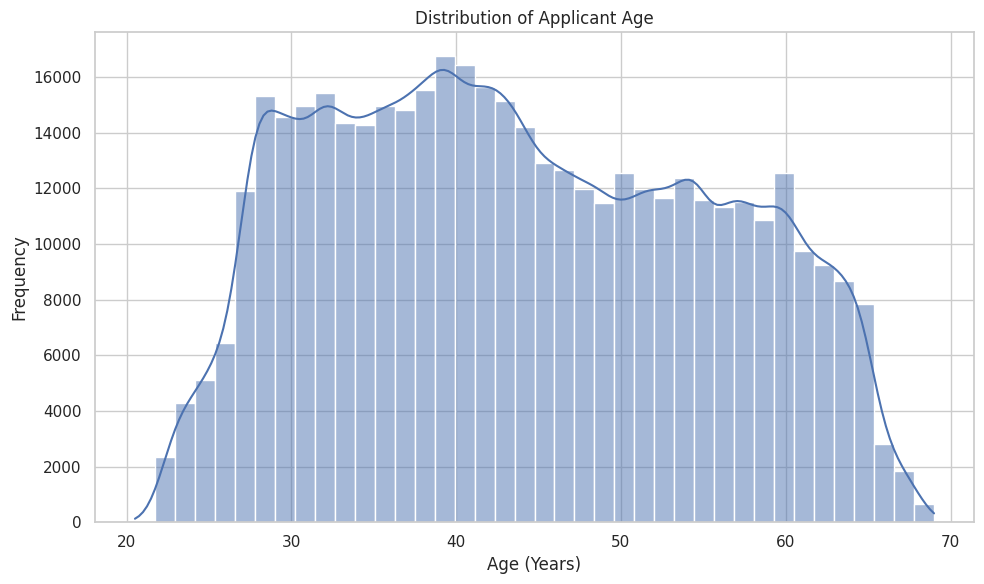

In [ ]:
# ============================================================
# Visualization 2 – Age Distribution
# ============================================================

plt.figure(figsize=(10,6))
sns.histplot(app['AGE_YEARS'], bins=40, kde=True)
plt.title("Distribution of Applicant Age")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# Create STATUS_LABEL
# ============================================================

status_labels = {
    'C': 'Paid Off',
    '0': '1–29 days overdue',
    '1': '30–59 days overdue',
    '2': '60–89 days overdue',
    '3': '90–119 days overdue',
    '4': '120–149 days overdue',
    '5': 'Over 150 days / Write-off',
    'X': 'No loan for the month'
}

cred['STATUS_LABEL'] = cred['STATUS'].map(status_labels)

print("Unique STATUS_LABEL values:")
print(cred['STATUS_LABEL'].value_counts())

Unique STATUS_LABEL values:
STATUS_LABEL
Paid Off                     442031
1–29 days overdue            383120
No loan for the month        209230
30–59 days overdue            11090
Over 150 days / Write-off      1693
60–89 days overdue              868
90–119 days overdue             320
120–149 days overdue            223
Name: count, dtype: int64


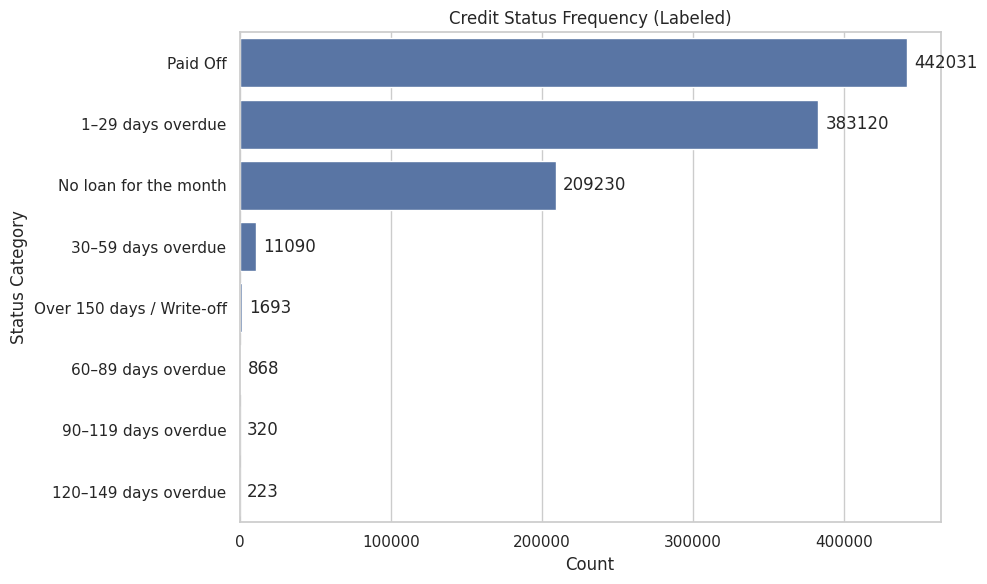

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# Visualization 3 – Credit Status Breakdown
# ============================================================

plt.figure(figsize=(10,6))

ax = sns.countplot(
    y=cred['STATUS_LABEL'],
    order=cred['STATUS_LABEL'].value_counts().index
)

# Add count labels to each bar
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',           # show integer count
        label_type='edge',  # place label at the end of the bar
        padding=5           # small space between bar and label
    )

plt.title("Credit Status Frequency (Labeled)")
plt.xlabel("Count")
plt.ylabel("Status Category")
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# Full Modeling Pipeline – Imports
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# ============================================================
# Label Creation & Merge
# ============================================================

# Convert STATUS to binary target:
# 1 = delinquent (statuses 1–5)
# 0 = non-delinquent (C or 0)
delinquent_codes = ['1','2','3','4','5']
cred['BAD_FLAG'] = cred['STATUS'].isin(delinquent_codes).astype(int)

# Aggregate credit records to applicant-level label
target_df = cred.groupby('ID')['BAD_FLAG'].max().reset_index()

# Merge into application file
full_df = app.merge(target_df, on='ID', how='inner')

print("Merged dataset shape:", full_df.shape)
full_df['BAD_FLAG'].value_counts()

Merged dataset shape: (36457, 22)


,count
BAD_FLAG,
0,32166
1,4291


In [ ]:
# ============================================================
# Feature Selection
# ============================================================

features = [
    'AMT_INCOME_TOTAL',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS'
]

X = full_df[features].copy()
y = full_df['BAD_FLAG']

# Handle missing values
X = X.fillna(X.median())

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# ============================================================
# Train-Test Split + SMOTE
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: BAD_FLAG
0    25732
1     3433
Name: count, dtype: int64
After SMOTE: BAD_FLAG
0    25732
1    25732
Name: count, dtype: int64


In [ ]:
# ============================================================
# Visualization Helpers
# ============================================================

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],'--')
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return auc

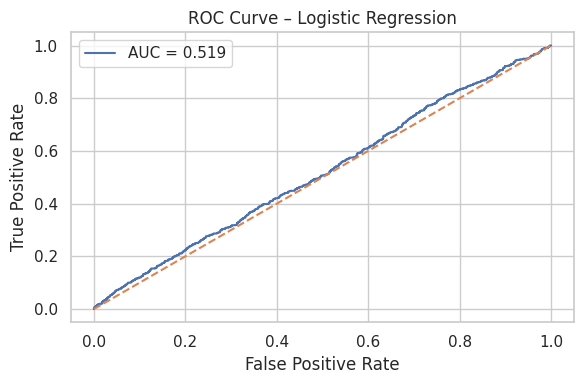

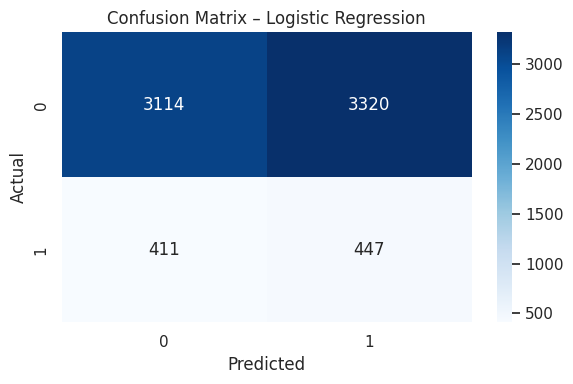

              precision    recall  f1-score   support

           0       0.88      0.48      0.63      6434
           1       0.12      0.52      0.19       858

    accuracy                           0.49      7292
   macro avg       0.50      0.50      0.41      7292
weighted avg       0.79      0.49      0.57      7292



In [ ]:
# ============================================================
# Logistic Regression
# ============================================================

lr = LogisticRegression(max_iter=2000, class_weight='balanced')
lr.fit(X_train_sm, y_train_sm)

lr_pred = lr.predict(X_test)
lr_auc = plot_roc(lr, X_test, y_test, "ROC Curve – Logistic Regression")
plot_confusion(y_test, lr_pred, "Confusion Matrix – Logistic Regression")

print(classification_report(y_test, lr_pred))

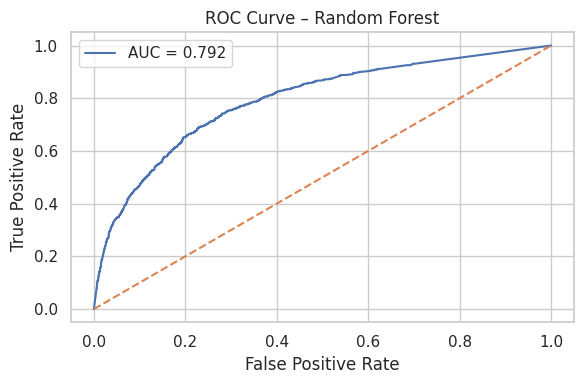

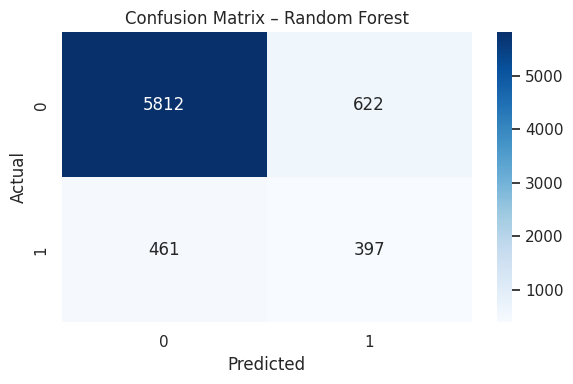

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6434
           1       0.39      0.46      0.42       858

    accuracy                           0.85      7292
   macro avg       0.66      0.68      0.67      7292
weighted avg       0.86      0.85      0.86      7292



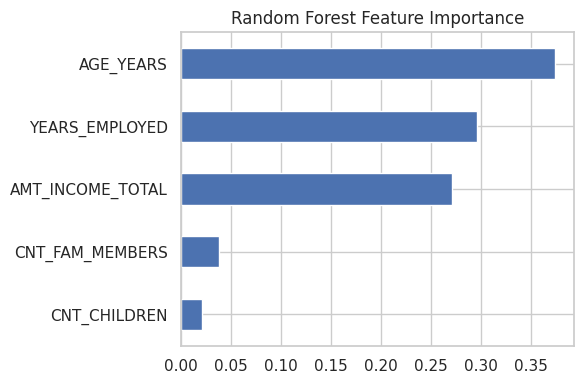

In [ ]:
# ============================================================
# Random Forest
# ============================================================

rf = RandomForestClassifier(
    n_estimators=250,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_sm, y_train_sm)

rf_pred = rf.predict(X_test)
rf_auc = plot_roc(rf, X_test, y_test, "ROC Curve – Random Forest")
plot_confusion(y_test, rf_pred, "Confusion Matrix – Random Forest")

print(classification_report(y_test, rf_pred))

# Feature Importance Plot
feat_imp = pd.Series(rf.feature_importances_, index=features)
feat_imp.sort_values().plot(kind='barh', figsize=(6,4), title="Random Forest Feature Importance")
plt.tight_layout()
plt.show()

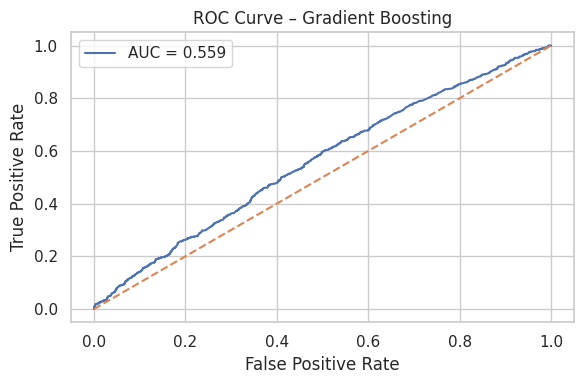

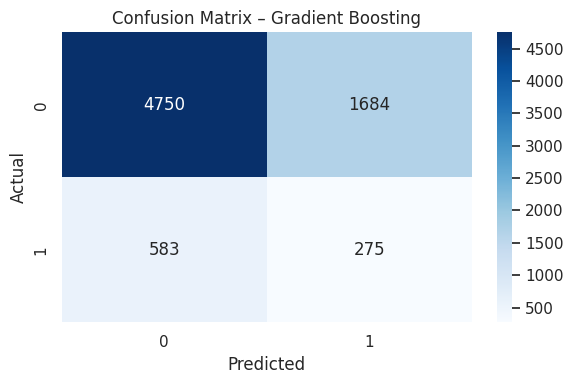

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      6434
           1       0.14      0.32      0.20       858

    accuracy                           0.69      7292
   macro avg       0.52      0.53      0.50      7292
weighted avg       0.80      0.69      0.74      7292



In [ ]:
# ============================================================
# Gradient Boosting
# ============================================================

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sm, y_train_sm)

gb_pred = gb.predict(X_test)
gb_auc = plot_roc(gb, X_test, y_test, "ROC Curve – Gradient Boosting")
plot_confusion(y_test, gb_pred, "Confusion Matrix – Gradient Boosting")

print(classification_report(y_test, gb_pred))

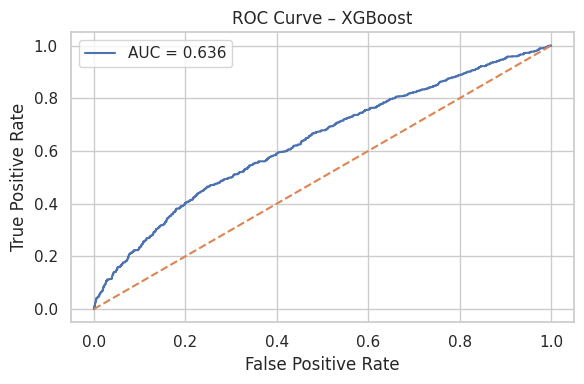

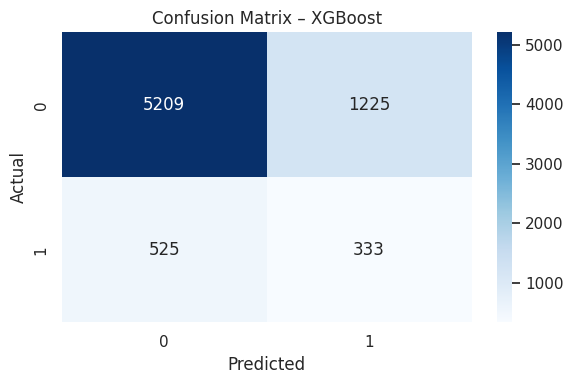

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      6434
           1       0.21      0.39      0.28       858

    accuracy                           0.76      7292
   macro avg       0.56      0.60      0.57      7292
weighted avg       0.83      0.76      0.79      7292



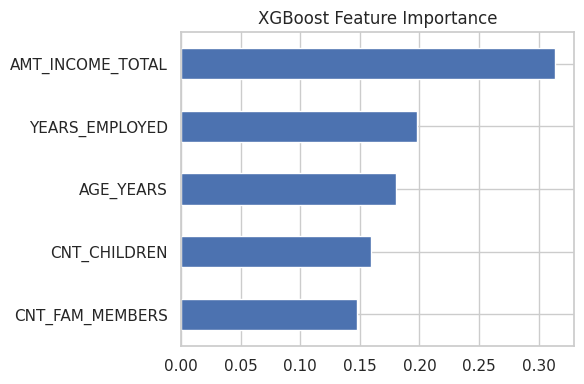

In [ ]:
# ============================================================
# XGBoost
# ============================================================

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train_sm, y_train_sm)

xgb_pred = xgb.predict(X_test)
xgb_auc = plot_roc(xgb, X_test, y_test, "ROC Curve – XGBoost")
plot_confusion(y_test, xgb_pred, "Confusion Matrix – XGBoost")

print(classification_report(y_test, xgb_pred))

# Feature importance
xgb_imp = pd.Series(xgb.feature_importances_, index=features)
xgb_imp.sort_values().plot(kind='barh', figsize=(6,4), title="XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# Compare AUC Scores
# ============================================================

results = pd.DataFrame({
    'Model': ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    'AUC': [lr_auc, rf_auc, gb_auc, xgb_auc]
})

results.sort_values(by="AUC", ascending=False)

,Model,AUC
1,Random Forest,0.791978
3,XGBoost,0.635787
2,Gradient Boosting,0.559250
0,Logistic Regression,0.518928


In [ ]:
# ============================================================
# FULL MODELING PIPELINE – MATCHED TO SECTIONED VERSION
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# ============================================================
# Step 1: Build Binary Target (BAD_FLAG)
# ============================================================

delinquent_codes = ['1','2','3','4','5']
cred['BAD_FLAG'] = cred['STATUS'].isin(delinquent_codes).astype(int)

target_df = cred.groupby('ID')['BAD_FLAG'].max().reset_index()

full_df = app.merge(target_df, on='ID', how='inner')
print("Merged dataset shape:", full_df.shape)
print(full_df['BAD_FLAG'].value_counts())


# ============================================================
# Step 2: Feature Selection + Scaling
# ============================================================

features = [
    'AMT_INCOME_TOTAL',
    'AGE_YEARS',
    'YEARS_EMPLOYED',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS'
]

X = full_df[features].copy()
y = full_df['BAD_FLAG']

# Fill missing
X = X.fillna(X.median())

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# ============================================================
# Step 3: Train/Test Split + SMOTE
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_sm.value_counts())


# ============================================================
# Helper: Model Evaluation
# ============================================================

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    probas = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, probas)

    print("\n--------------------------------------")
    print(model.__class__.__name__)
    print("--------------------------------------")
    print("Accuracy:", round(acc,4))
    print("Precision:", round(prec,4))
    print("Recall:", round(rec,4))
    print("F1 Score:", round(f1,4))
    print("ROC-AUC:", round(auc,4))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print("\nClassification Report:")
    print(classification_report(y_test, preds))

    return auc


# ============================================================
# Step 4: Define Training Models
# ============================================================

models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight='balanced'
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=250,
        max_depth=None,
        random_state=42,
        class_weight='balanced'
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),

    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    )
}


# ============================================================
# Step 5: Train + Evaluate All 4 Models
# ============================================================

auc_scores = {}

for name, model in models.items():
    print(f"\n\n===== Training {name} =====")
    model.fit(X_train_sm, y_train_sm)
    auc_scores[name] = evaluate(model, X_test, y_test)


# ============================================================
# Step 6: AUC Score Comparison Table
# ============================================================

results = pd.DataFrame({
    "Model": list(auc_scores.keys()),
    "AUC": list(auc_scores.values())
})

print("\n\n===== AUC Comparison =====")
print(results.sort_values(by="AUC", ascending=False))

Merged dataset shape: (36457, 22)
BAD_FLAG
0    32166
1     4291
Name: count, dtype: int64
Before SMOTE:
 BAD_FLAG
0    25732
1     3433
Name: count, dtype: int64

After SMOTE:
 BAD_FLAG
0    25732
1    25732
Name: count, dtype: int64


===== Training Logistic Regression =====

--------------------------------------
LogisticRegression
--------------------------------------
Accuracy: 0.4883
Precision: 0.1187
Recall: 0.521
F1 Score: 0.1933
ROC-AUC: 0.5189

Confusion Matrix:
[[3114 3320]
 [ 411  447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.48      0.63      6434
           1       0.12      0.52      0.19       858

    accuracy                           0.49      7292
   macro avg       0.50      0.50      0.41      7292
weighted avg       0.79      0.49      0.57      7292



===== Training Random Forest =====

--------------------------------------
RandomForestClassifier
--------------------------------------
Accura

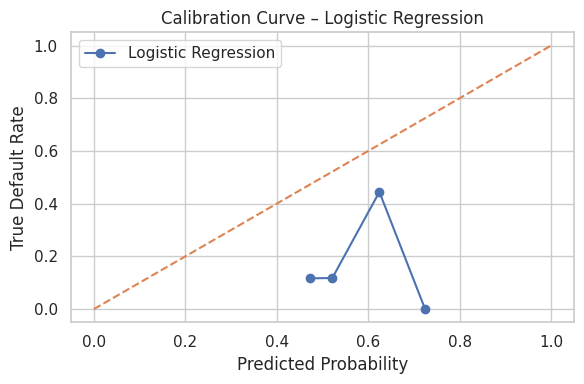

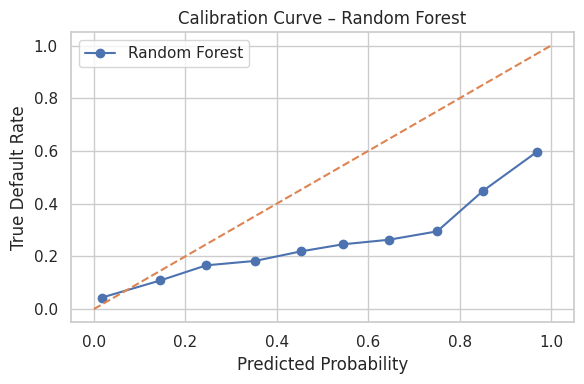

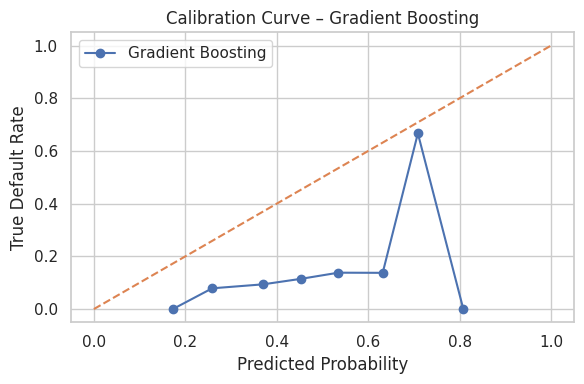

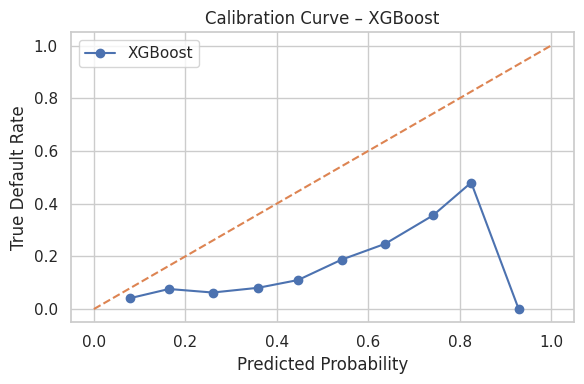

In [ ]:
# ============================================================
# Calibration Curves – LR, RF, GB, XGB
# ============================================================

from sklearn.calibration import calibration_curve

def plot_calibration(model, X_test, y_test, label):
    prob = model.predict_proba(X_test)[:,1]
    prob_true, prob_pred = calibration_curve(y_test, prob, n_bins=10)

    plt.figure(figsize=(6,4))
    plt.plot(prob_pred, prob_true, marker='o', label=label)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.xlabel("Predicted Probability")
    plt.ylabel("True Default Rate")
    plt.title(f"Calibration Curve – {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_calibration(lr, X_test, y_test, "Logistic Regression")
plot_calibration(rf, X_test, y_test, "Random Forest")
plot_calibration(gb,  X_test, y_test, "Gradient Boosting")
plot_calibration(xgb, X_test, y_test, "XGBoost")

In [ ]:
# ============================================================
# Threshold Tuning for Champion Model (Random Forest)
# ============================================================

def evaluate_threshold(model, X_test, y_test, threshold):
    prob = model.predict_proba(X_test)[:,1]
    preds = (prob >= threshold).astype(int)

    cm = confusion_matrix(y_test, preds)
    print(f"\nThreshold = {threshold}")
    print(cm)
    print("Recall:", recall_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))

thresholds = [0.10, 0.20, 0.30, 0.40, 0.50]

for t in thresholds:
    evaluate_threshold(rf, X_test, y_test, t)


Threshold = 0.1
[[4317 2117]
 [ 195  663]]
Recall: 0.7727272727272727
Precision: 0.23848920863309353

Threshold = 0.2
[[4984 1450]
 [ 276  582]]
Recall: 0.6783216783216783
Precision: 0.28641732283464566

Threshold = 0.3
[[5391 1043]
 [ 357  501]]
Recall: 0.583916083916084
Precision: 0.3244818652849741

Threshold = 0.4
[[5637  797]
 [ 412  446]]
Recall: 0.5198135198135199
Precision: 0.3588093322606597

Threshold = 0.5
[[5812  622]
 [ 461  397]]
Recall: 0.4627039627039627
Precision: 0.38959764474975467


In [ ]:
# ============================================================
# Random Forest Hyperparameter Tuning (Light Grid Search)
# ============================================================

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [150, 250],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

rf_tuned = RandomForestClassifier(class_weight='balanced', random_state=42)

grid = GridSearchCV(
    rf_tuned, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1
)

grid.fit(X_train_sm, y_train_sm)

print("Best Params:", grid.best_params_)
print("Best AUC:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 250}
Best AUC: 0.9447507918645116


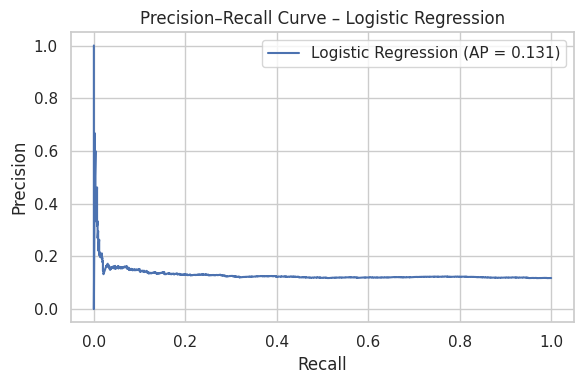

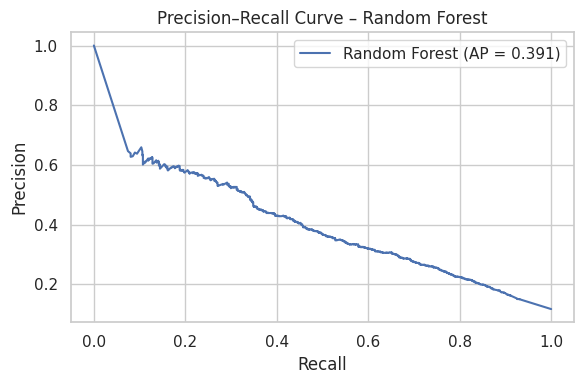

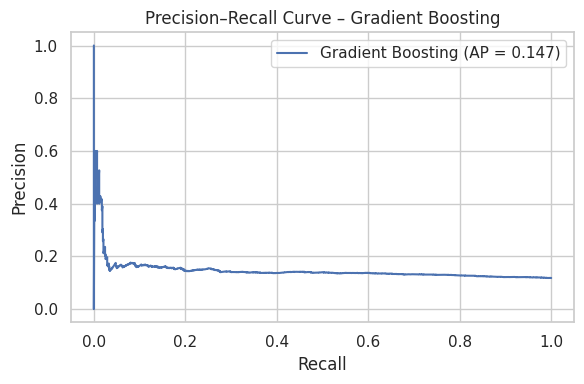

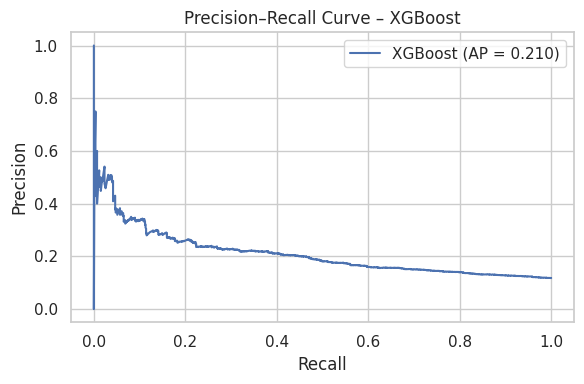

In [ ]:
# ============================================================
# Precision–Recall Curves – All Models
# ============================================================

from sklearn.metrics import precision_recall_curve, average_precision_score

def plot_pr(model, X_test, y_test, label):
    prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, prob)
    ap = average_precision_score(y_test, prob)

    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"{label} (AP = {ap:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision–Recall Curve – {label}")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_pr(lr, X_test, y_test, "Logistic Regression")
plot_pr(rf, X_test, y_test, "Random Forest")
plot_pr(gb, X_test, y_test, "Gradient Boosting")
plot_pr(xgb, X_test, y_test, "XGBoost")

Using SHAP sample size: 500


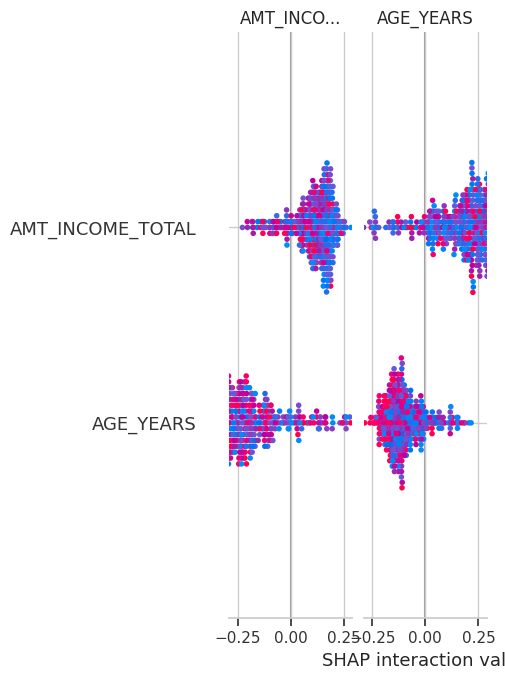

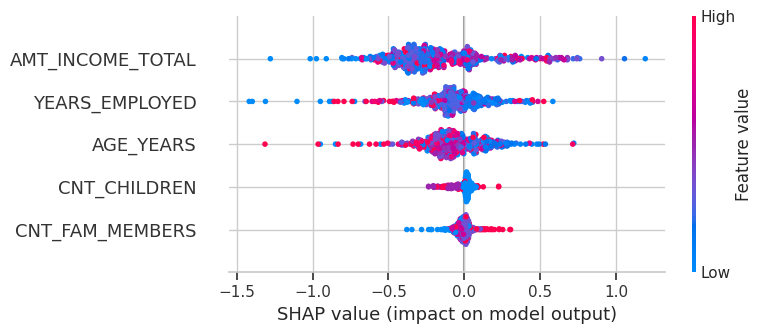

In [ ]:
# ============================================================
# SHAP Explanations – Random Forest and XGBoost (500-row sample)
# ============================================================

import shap
shap.initjs()

# ------------------------------------------------------------
# Create a sample to drastically improve SHAP speed
# ------------------------------------------------------------
sample_size = 500 if X_test.shape[0] > 500 else X_test.shape[0]
X_test_sample = X_test[:sample_size]
y_test_sample = y_test[:sample_size]

print("Using SHAP sample size:", sample_size)

# ------------------------------------------------------------
# SHAP – Random Forest
# ------------------------------------------------------------
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_sample)

shap.summary_plot(
    shap_values_rf,
    X_test_sample,
    feature_names=features,
    show=True
)

# ------------------------------------------------------------
# SHAP – XGBoost
# ------------------------------------------------------------
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test_sample)

shap.summary_plot(
    shap_values_xgb,
    X_test_sample,
    feature_names=features,
    show=True
)

Using SHAP sample size: 500


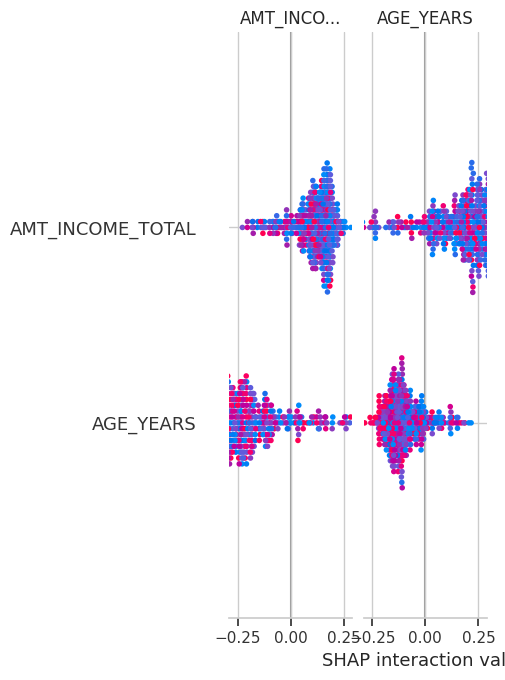

In [ ]:
# ============================================================
# SHAP Explanations – Random Forest and XGBoost (500-row sample)
# ============================================================

import shap
shap.initjs()

# ------------------------------------------------------------
# Create a sample to drastically improve SHAP speed
# ------------------------------------------------------------
sample_size = 500 if X_test.shape[0] > 500 else X_test.shape[0]
X_test_sample = X_test[:sample_size]
y_test_sample = y_test[:sample_size]

print("Using SHAP sample size:", sample_size)

# ------------------------------------------------------------
# SHAP – Random Forest
# ------------------------------------------------------------
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_sample)

shap.summary_plot(
    shap_values_rf,
    X_test_sample,
    feature_names=features,
    show=True
)